In [106]:
import sys
import os
import numpy as np
import pdb
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multiparam_output_loader import MultiParamOutputLoader

# output = MultiParamOutputLoader("/nfs01/covid_sims/1591720627.0466504-test_protocol_QFNR/")
# need to specify the following line by your own path
output = MultiParamOutputLoader(module_path + "/src/simulations_v2/sim_output/1596654154-multiparam/")

/Users/stevewangen/projects/COVID/uw_reopening/src/simulations_v2/multiparam_output_loader.py:60: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  param_specifier = yaml.load(f)


In [77]:
output.param_scenarios

['Nominal Parameters']

In [79]:
output.sim_results['Nominal Parameters'][(0.00030488, 0.000274, 0.07142857143, 0.1)][1]

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections,severity_0,severity_1,severity_2,severity_3
0,3648,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000
1,3646,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0.0,0.975404,0.018016,0.006580
2,3645,1,1,0,0,1,0,1,0,0,...,0,0,0,0,1,1,0.0,0.975404,0.018016,0.006580
3,3645,0,1,0,1,1,1,0,0,0,...,0,0,0,1,1,2,1.0,0.975404,0.018016,0.006580
4,3645,0,1,0,1,1,0,0,0,0,...,0,0,0,1,1,2,1.0,0.975404,0.018016,0.006580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2420,104,229,819,3,2,2,0,1,0,...,0,0,0,539,561,51,539.0,547.201722,10.106871,3.691407
109,2425,89,227,835,5,4,1,2,0,1,...,1,0,0,543,565,52,543.0,551.103338,10.178934,3.717728
110,2428,81,217,853,6,2,2,1,0,0,...,0,0,0,546,569,52,546.0,555.004955,10.250997,3.744048
111,2426,75,212,873,7,1,1,1,0,0,...,0,0,0,547,576,52,547.0,561.832784,10.377108,3.790108


In [81]:
from deprecated.params import ParamConfig

# Massey's suggestion (but syntax looks different)
# from load_params import load_params

base_params = ParamConfig.load_config('fall', True, 'nominal')
params = base_params.copy()

In [82]:
cumulative_cols = ['QI','R'] + ['E_{}'.format(x) for x in range(params['max_time_exposed'])] + \
                ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
recovered_cols = ['R']
active_cols = ['QI'] + ['E_{}'.format(x) for x in range(params['max_time_exposed'])] + \
                ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
free_infectious = ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]

In [83]:
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from analysis_helpers import poisson_waiting_function, \
                            run_multiple_trajectories, \
                            plot_aip_vs_t, get_active_infection_cols, get_pop_size,\
                            plot_cip_vs_t, \
                            run_sensitivity_sims, \
                            extract_cips, \
                            load_sim_dir

In [111]:
def plot_fig1(i, data, day):
    #plt.figure(figsize=(15,9))
    #sample = dfsoutput.sim_results['Nominal Parameters'][][0]
    # sample = data
    plt.ylim(0, 600)

    for sample in data:
        # plt.plot(sample[cumulative_cols].sum(axis=1), linewidth=8.0, alpha=0.8, color='blue')
        # plt.plot(sample[recovered_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='red')
        plt.plot(sample[active_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='purple')
        plt.plot(sample[free_infectious].sum(axis=1), linewidth=2.5, alpha=0.5, color='green')
        plt.xlabel("Day", size=14)
    if i==0:
        plt.ylabel("Number of Infected Rooms", size=14)
    #plt.title('Simulated COVID Progression under Nominal Parameters\n ({}%initial prevalence, {}-day testing)'.format(round(100 * int_pre, 3), day), size=18)
    #plt.title('({}%initial prevalence, {}-day testing)'.format(round(100 * int_pre, 3), day), size=10)
    plt.title('({}-day testing)'.format(day), size=10)
    if i==0:
        # plt.legend(('Cumulative people with COVID', 'Recovered', 'Active', 'Free Infectious'), loc='best')
        plt.legend(('Active Infections', 'Free Infectious'), loc='best')
#sample_high

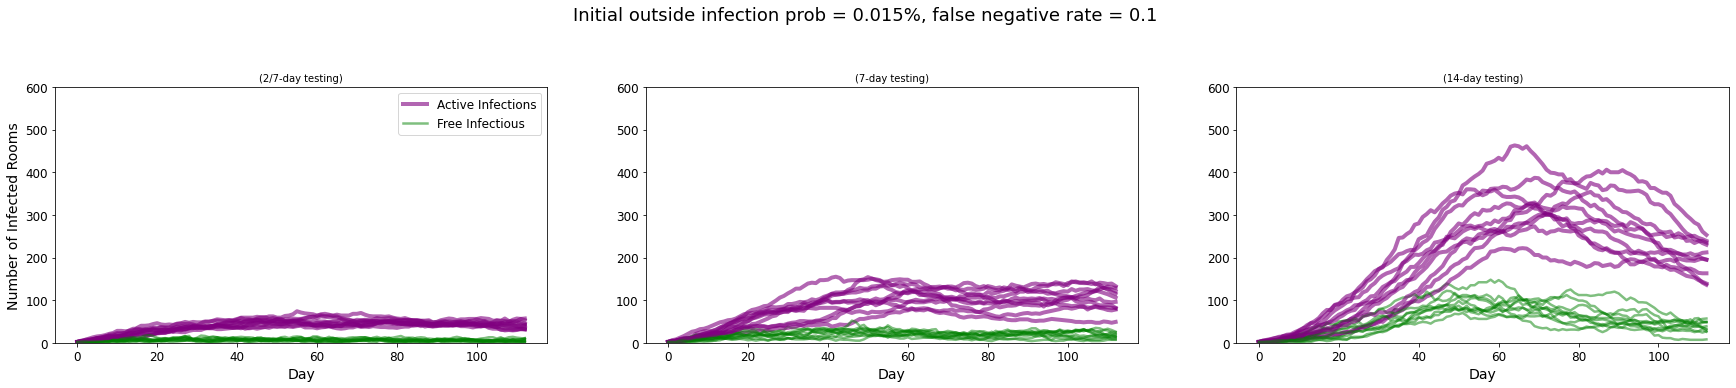

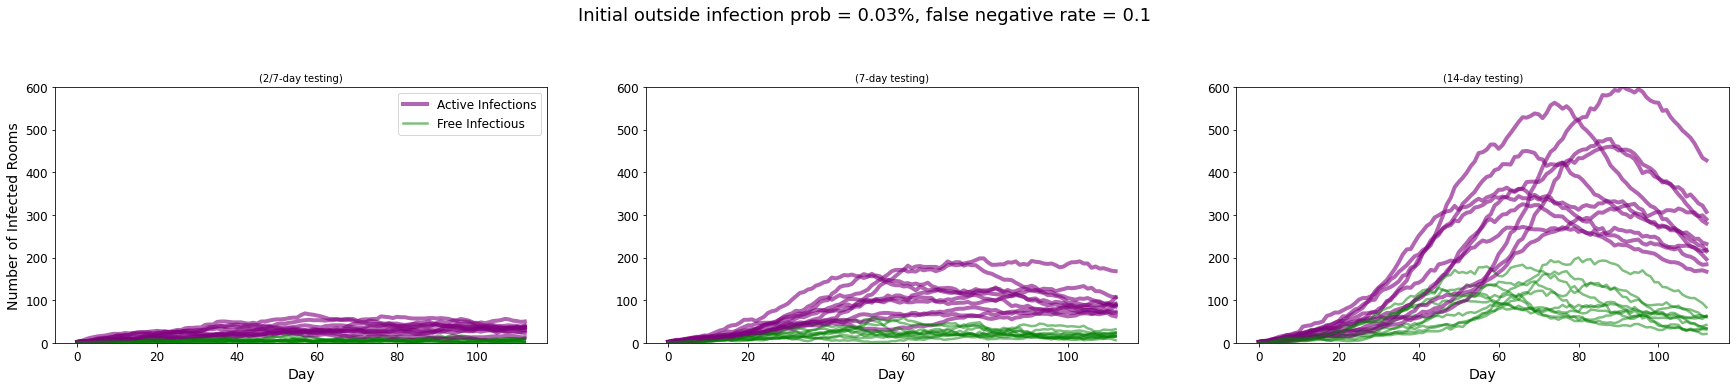

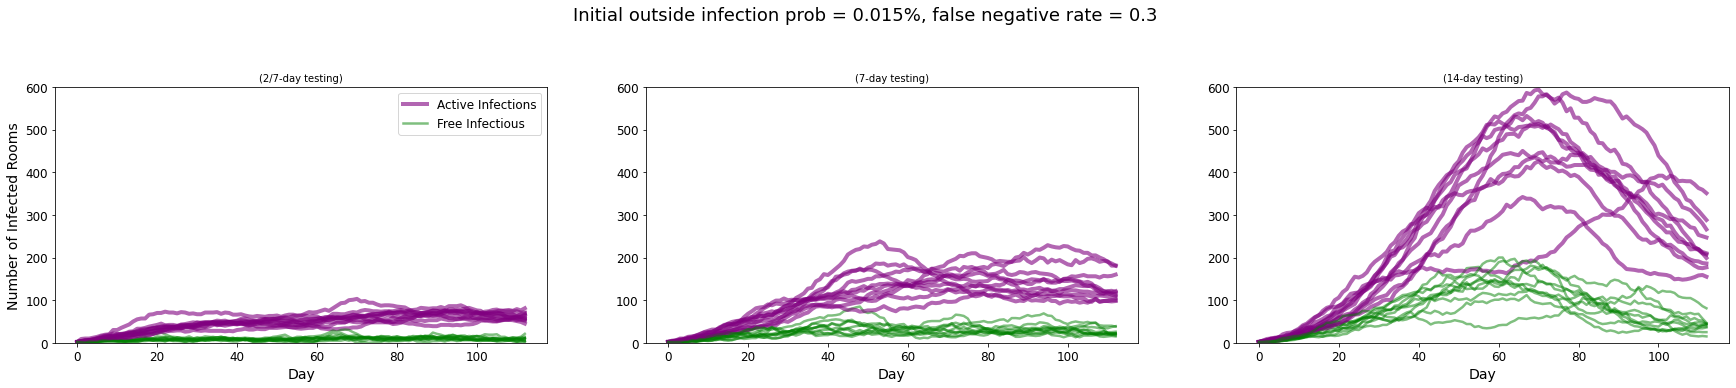

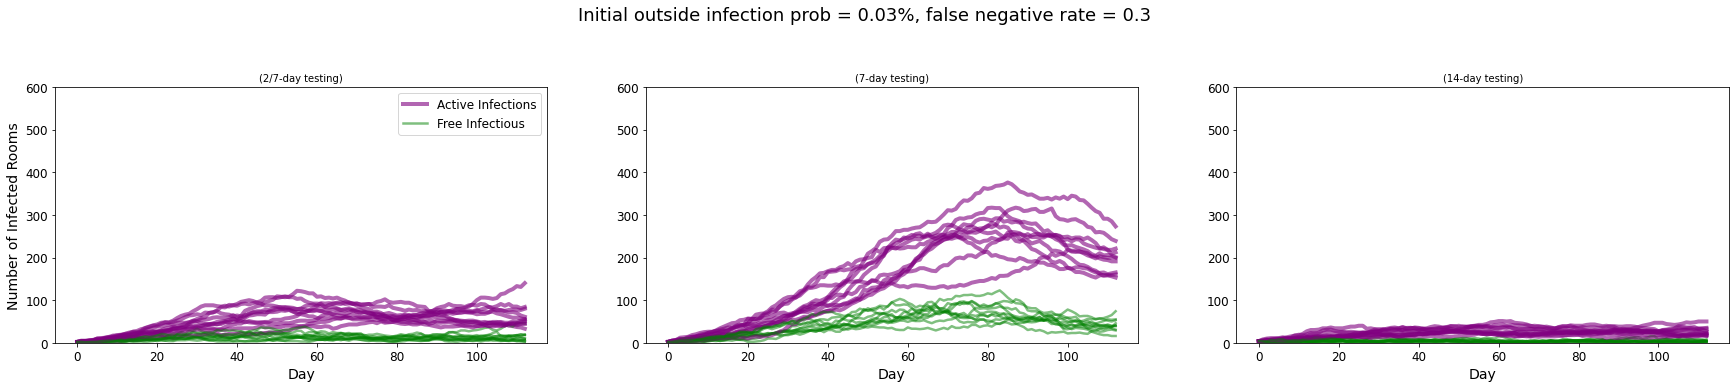

In [115]:
initial_ID_pre_val = [0.000274, 0.0009, 0.00274]
test_popu_frac_val = [0.2857142857, 0.142857142857143, 0.07142857143]
outside_infection_p = [0.00015244, 0.00030488]
test_day = ['2/7', '7', '14']
false_neg_rate = [0.10, 0.30]

dfs=output.sim_results['Nominal Parameters']
for fnr in range(len(false_neg_rate)):
    for oip in range(len(outside_infection_p)):
        fig = plt.figure(figsize=(30,16))
        fig.suptitle('Initial outside infection prob = {}%, false negative rate = {}'.format(round(100 * outside_infection_p[oip], 3), false_neg_rate[fnr]), size=18, y = 0.95)
        fig_count = 0
        # for j in range(len(initial_ID_pre_val)):
        for test_fraction in range(len(test_popu_frac_val)):
            fig_count = fig_count + 1
            plt.subplot(3, 3, fig_count)
            sim_results = dfs[(outside_infection_p[oip], initial_ID_pre_val[0], test_popu_frac_val[test_fraction], false_neg_rate[fnr])]
            plot_fig1(test_fraction, sim_results, test_day[test_fraction])

In [110]:
d = dfs[(outside_infection_p[oip], initial_ID_pre_val[0], test_popu_frac_val[test_fraction], false_neg_rate[fnr])]

In [103]:
outside_infection_p[oip]

0.00030488

In [102]:
initial_ID_pre_val[0]

0.000274

In [104]:
test_popu_frac_val[test_fraction]

0.07142857143

In [105]:
false_neg_rate[fnr]

0.3

In [100]:
d[0]

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections,severity_0,severity_1,severity_2,severity_3
0,3646,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000
1,3645,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000
2,3643,0,2,0,1,1,1,0,0,0,...,0,0,0,1,2,2,1.0,1.950808,0.036032,0.013160
3,3636,5,2,0,1,1,1,0,0,0,...,0,0,0,2,2,3,2.0,1.950808,0.036032,0.013160
4,3633,6,3,0,2,2,0,0,0,0,...,0,0,0,2,2,3,2.0,1.950808,0.036032,0.013160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,3432,12,33,171,1,0,0,0,0,0,...,0,0,0,100,104,110,100.0,101.442030,1.873644,0.684325
109,3433,10,32,172,1,0,0,0,0,0,...,0,0,0,100,104,111,100.0,101.442030,1.873644,0.684325
110,3432,8,30,175,1,1,0,1,0,0,...,0,0,0,101,104,114,101.0,101.442030,1.873644,0.684325
111,3434,5,29,176,2,0,1,0,0,0,...,0,0,0,101,104,114,101.0,101.442030,1.873644,0.684325
